In [5]:
import numpy as np # linear algebra
import os
from tensorflow import keras
from tqdm import tqdm
import cv2
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow
from keras.applications.vgg19 import VGG19
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
path="/kaggle/input/fer13-cleaned-dataset/"

In [7]:
labels = ['fear', 'Angry', 'Neutral', 'disgust', 'Happy']

In [8]:
print("pre-processing data\n")

image_data=[]
label_data=[]
image_size=150

for i in labels:
    data_path=os.path.join("/kaggle/input/","fer13-cleaned-dataset",i)
    for m in tqdm(os.listdir(data_path)):
        image=cv2.imread(os.path.join(data_path,m))
        image=cv2.resize(image,(image_size,image_size))
        
        image_data.append(image)
        label_data.append(i)
        
image_data=np.array(image_data)
label_data=np.array(label_data)

pre-processing data



100%|██████████| 6834/6834 [00:21<00:00, 323.42it/s]


In [9]:
image_data,label_data=shuffle(image_data,label_data,random_state=42)

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(image_data,label_data,test_size=0.2,random_state=42)

In [11]:
train_label_data_new=[]
test_label_data_new=[]
for n in Y_train:
    train_label_data_new.append(labels.index(n))
Y_train=train_label_data_new
Y_train=to_categorical(Y_train)
    
for n in Y_test:
    test_label_data_new.append(labels.index(n))
Y_test=test_label_data_new
Y_test=to_categorical(Y_test)

In [12]:
Y_test

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

In [13]:
Y_train

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [14]:
num_classes = 5

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 10
epochs = 50
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5,          
    restore_best_weights=True )
history = model.fit(
    X_train,Y_train,
    validation_data=(X_test,Y_test),
    epochs=epochs,
    callbacks=[early_stopping]
)


Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 76ms/step - accuracy: 0.5185 - loss: 1.4411 - val_accuracy: 0.6200 - val_loss: 0.9625
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.6304 - loss: 0.9424 - val_accuracy: 0.6398 - val_loss: 0.9349
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.6801 - loss: 0.8354 - val_accuracy: 0.6448 - val_loss: 0.9329
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - accuracy: 0.7085 - loss: 0.7628 - val_accuracy: 0.6505 - val_loss: 0.9099
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.7298 - loss: 0.7001 - val_accuracy: 0.6555 - val_loss: 0.9027
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.7489 - loss: 0.6464 - val_accuracy: 0.6549 - val_loss: 0.9790
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.7813 - loss: 0.5758 - val_accuracy: 0.6368 - val_loss: 1.0209
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.8096 - loss: 0.5113 - 

In [17]:
loss, accuracy = model.evaluate(X_train, Y_train)
print("Train Loss: ", loss)
print("Train Accuracy: ", accuracy)

422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.7827 - loss: 0.5859
Train Loss:  0.5890845656394958
Train Accuracy:  0.7831851840019226


In [18]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6565 - loss: 0.9014
Test Loss:  0.9026966094970703
Test Accuracy:  0.6555094718933105


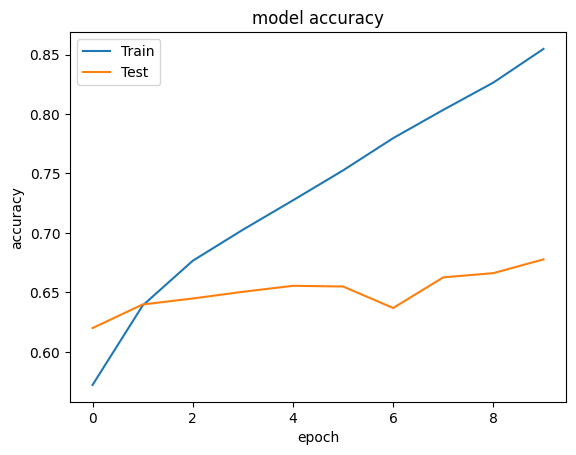

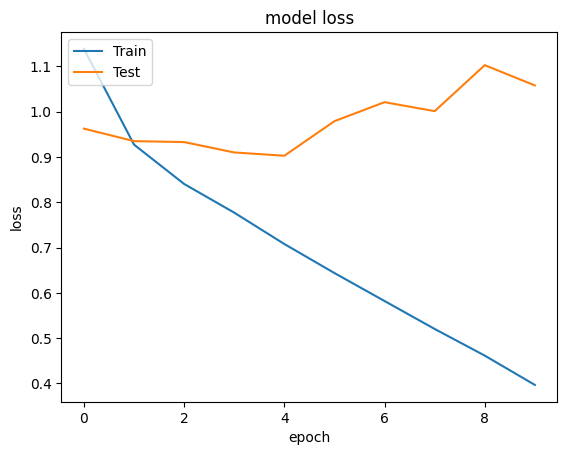

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
predictions = model.predict(X_test)
y_pred=np.argmax(predictions, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
display_c_m = ConfusionMatrixDisplay(cm, display_labels=labels)

106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step
[[ 278   60   92    2   74]
 [  88  249  123    5   94]
 [  74   89  576    1  148]
 [  18   20    6   24   17]
 [  56   47  147    2 1086]]


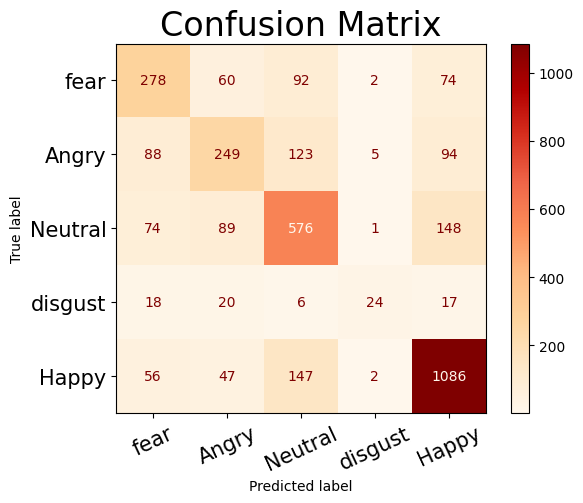

              precision    recall  f1-score   support

           0       0.54      0.55      0.55       506
           1       0.54      0.45      0.49       559
           2       0.61      0.65      0.63       888
           3       0.71      0.28      0.40        85
           4       0.77      0.81      0.79      1338

    accuracy                           0.66      3376
   macro avg       0.63      0.55      0.57      3376
weighted avg       0.65      0.66      0.65      3376



In [21]:
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix', fontsize=24)
plt.show()
print(classification_report(y_test, y_pred))